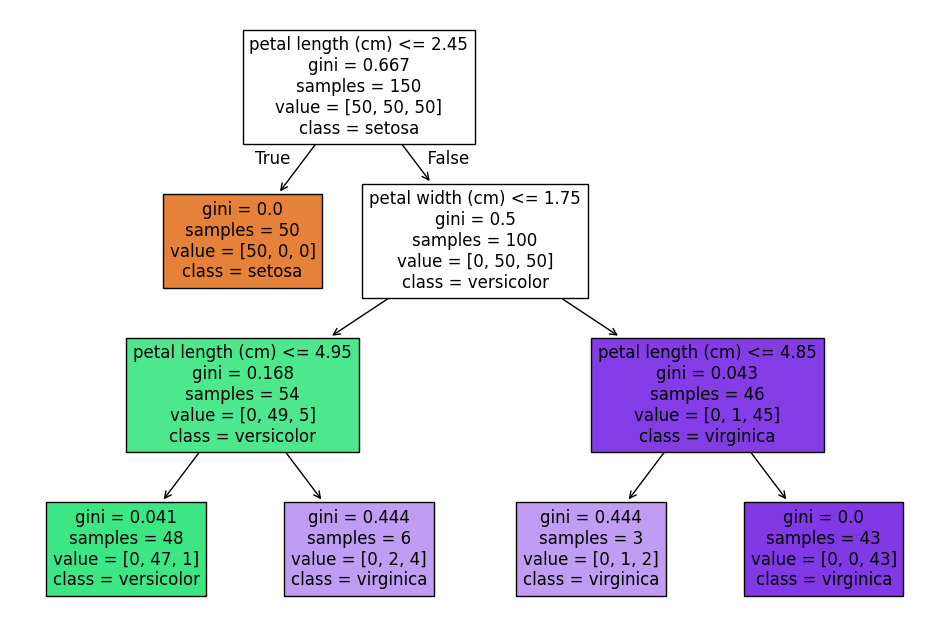

In [ ]:
# DT 결정나무 예제
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier , plot_tree
import matplotlib.pyplot as plt

# 데이터 가져오기
iris = load_iris()
X , Y = iris.data , iris.target

# 결정나무학습
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X, Y)

# 시각화
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=iris.feature_names, class_names= iris.target_names, filled=True )
plt.show()



In [8]:
# RF 랜덤포레스트

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. 데이터 불러오기
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

# 1a. 데이터 분류
X = df.drop('target', axis=1)  
Y = df['target']

# 2. 학습 / 테스트 데이터 분할
X_train,  X_test ,  Y_train , Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42)

# 3. 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, Y_train)

# 5. 예측
Y_pred = model.predict(X_test_scaled)

# 6. 평가
print("정확도:",accuracy_score(Y_test,Y_pred))
print("classification_report:",classification_report(Y_test,Y_pred))



정확도: 1.0
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



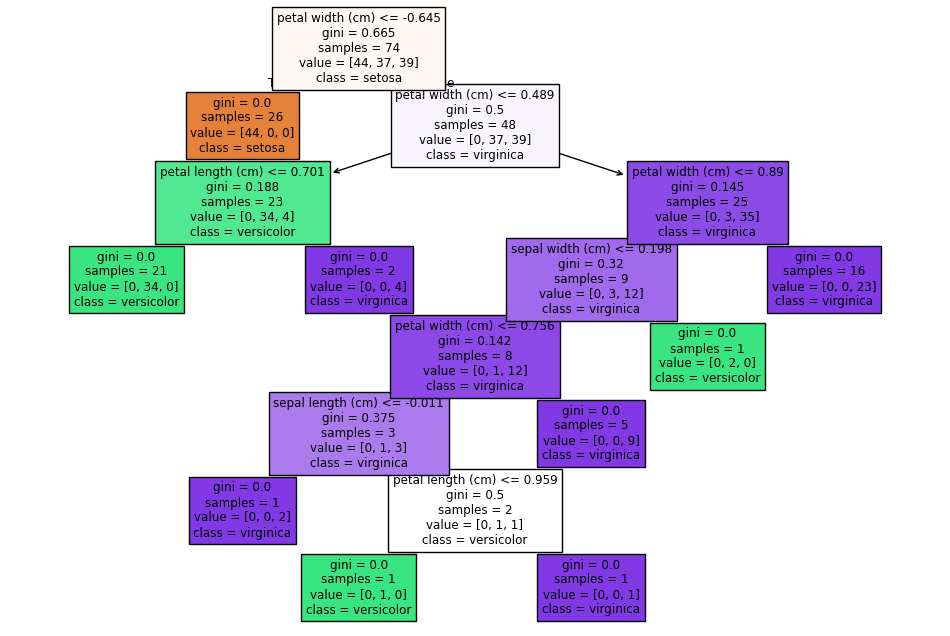

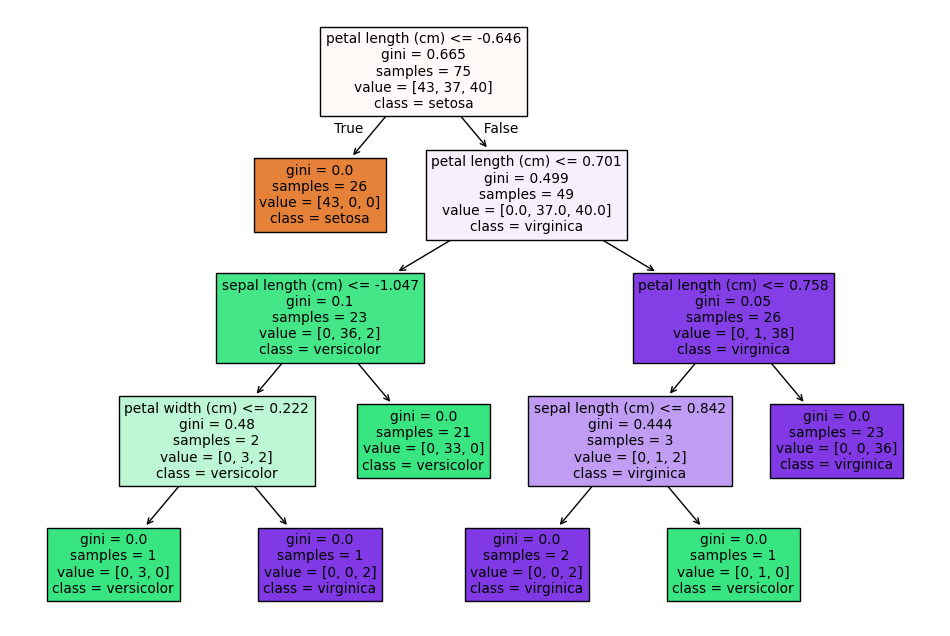

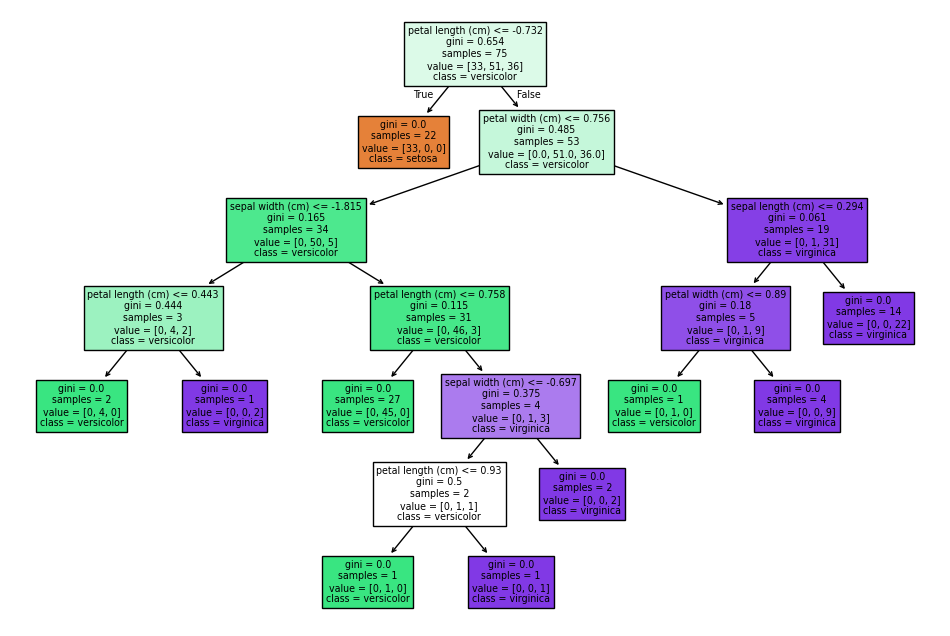

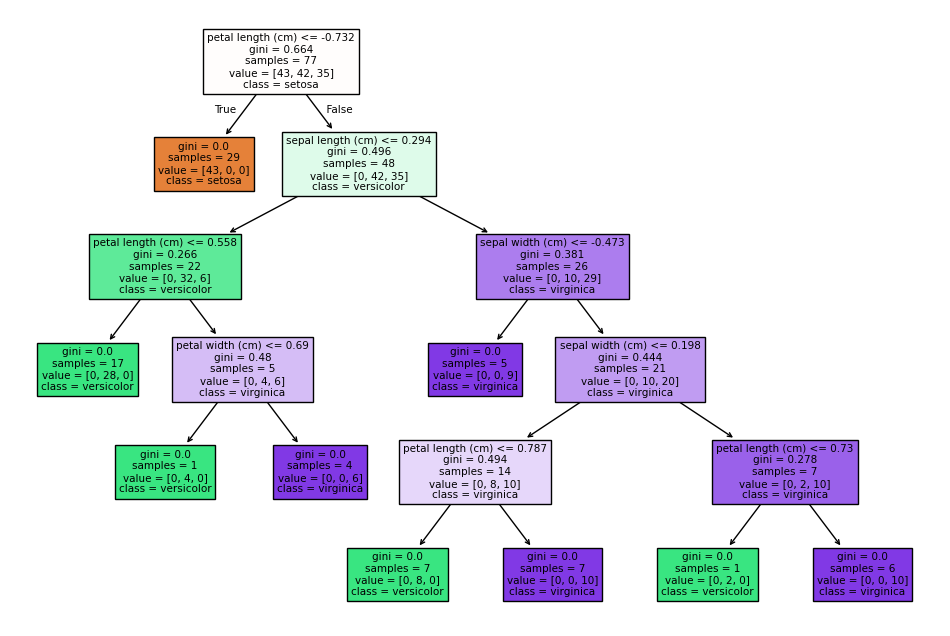

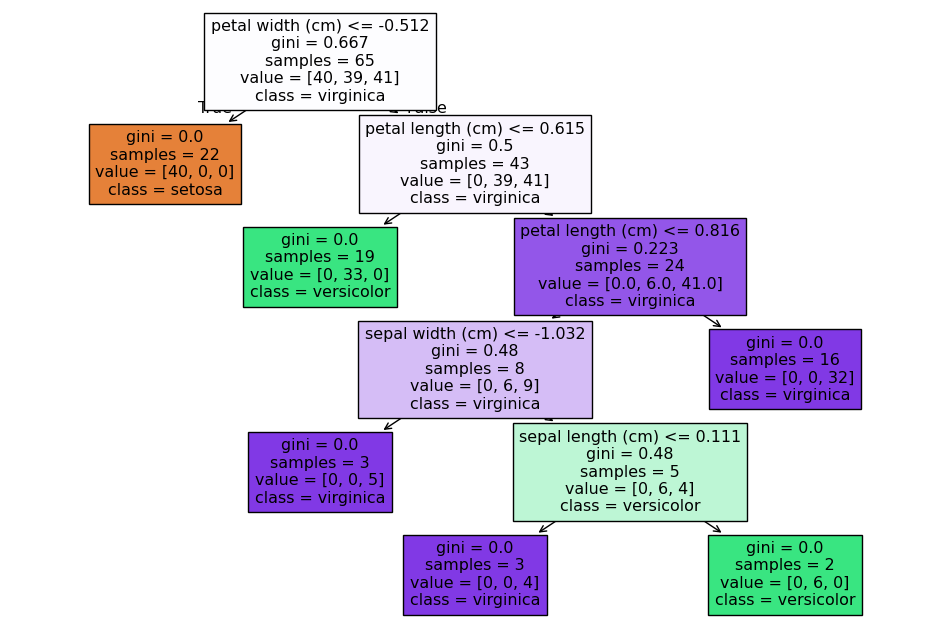

In [13]:
for estimator in model.estimators_[:5]:
    plt.figure(figsize=(12,8))
    plot_tree(estimator, feature_names=iris.feature_names, class_names= iris.target_names, filled=True )
    plt.show()